In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../mnist-data/", one_hot=True)

Extracting ../mnist-data/train-images-idx3-ubyte.gz
Extracting ../mnist-data/train-labels-idx1-ubyte.gz
Extracting ../mnist-data/t10k-images-idx3-ubyte.gz
Extracting ../mnist-data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images.shape

(55000, 784)

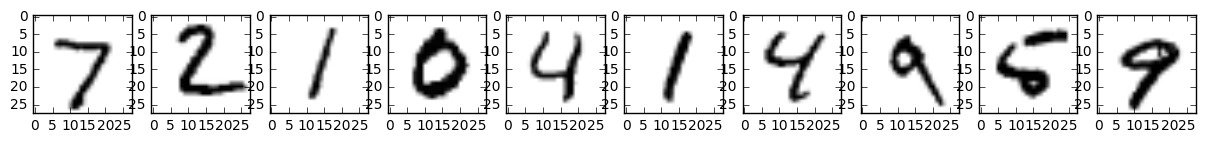

In [5]:
plt.figure(figsize=(15,5))
for i in list(range(10)):
    plt.subplot(1, 10, i+1)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D


Using TensorFlow backend.


In [7]:
from keras import backend as K

#tensorflow default channel ordering
input_shape = (28,28,1) #channel is third


In [8]:
model = Sequential()
model.add(Reshape(input_shape, input_shape=(784,)))

model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

## model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
## model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
## model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [9]:
from  functools import reduce

for l in model.layers:
    print(l.name, l.output_shape, [reduce(lambda x, y: x*y, w.shape) for w in l.get_weights()])

reshape_1 (None, 28, 28, 1) []
convolution2d_1 (None, 28, 28, 32) [288, 32]
convolution2d_2 (None, 28, 28, 32) [9216, 32]
maxpooling2d_1 (None, 14, 14, 32) []
convolution2d_3 (None, 14, 14, 64) [18432, 64]
convolution2d_4 (None, 14, 14, 64) [36864, 64]
maxpooling2d_2 (None, 7, 7, 64) []
flatten_1 (None, 3136) []
dropout_1 (None, 3136) []
dense_1 (None, 256) [802816, 256]
dropout_2 (None, 256) []
dense_2 (None, 10) [2560, 10]


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [11]:
model.fit(mnist.train.images, mnist.train.labels,
          batch_size=250, nb_epoch=5, verbose=1,
          validation_data=(mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 164s - loss: 0.3429 - acc: 0.8891 - val_loss: 0.0554 - val_acc: 0.9830
Epoch 2/5
55000/55000 [==============================] - 162s - loss: 0.0839 - acc: 0.9737 - val_loss: 0.0374 - val_acc: 0.9880
Epoch 3/5
55000/55000 [==============================] - 164s - loss: 0.0612 - acc: 0.9809 - val_loss: 0.0301 - val_acc: 0.9906
Epoch 4/5
55000/55000 [==============================] - 177s - loss: 0.0506 - acc: 0.9839 - val_loss: 0.0262 - val_acc: 0.9916
Epoch 5/5
55000/55000 [==============================] - 245s - loss: 0.0408 - acc: 0.9868 - val_loss: 0.0291 - val_acc: 0.9906


In [12]:
score = model.evaluate(mnist.test.images, mnist.test.labels,verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0291168964677
Test accuracy: 0.9906


In [13]:
# test item #100 is a six
pixels = mnist.test.images[100]
result = model.predict(np.array([pixels]))
dict(zip(range(10), result[0]))

{0: 2.6341266e-07,
 1: 8.378639e-13,
 2: 1.6261884e-10,
 3: 1.9536576e-13,
 4: 1.2481114e-08,
 5: 1.8234537e-08,
 6: 0.99999976,
 7: 5.9494445e-12,
 8: 1.2731046e-08,
 9: 1.3339049e-11}

In [14]:
def test_render(pixels, result, truth):
    #pixels, result and truth are np vectors
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')

    plt.subplot(1, 2, 2)
    
    #index, witdh
    ind = np.arange(len(result))
    width = 0.4

    plt.barh(ind,result, width, color='gray')
    plt.barh(ind+width,truth,width, color='green')
    plt.yticks(ind+width, range(10))
    plt.margins(y=0)

    plt.show()

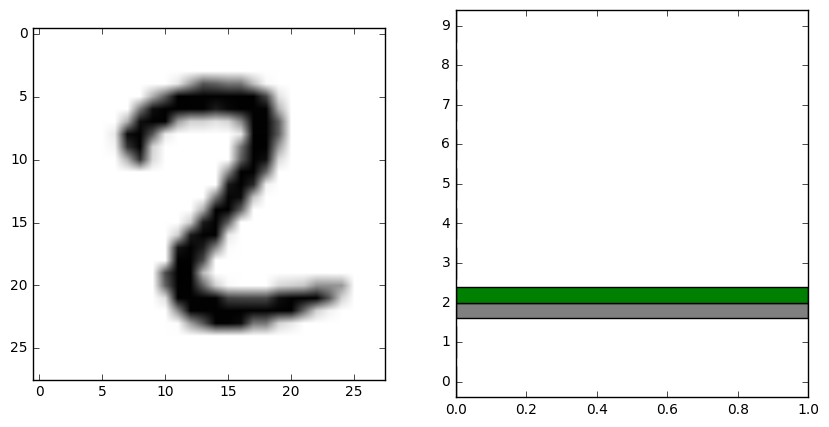

In [15]:
import random
i = random.randint(0,mnist.test.images.shape[0])

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]
test_render(pixels, result, truth)

In [16]:
### What went wrong?
pixels = mnist.test.images
result = model.predict_on_batch([pixels])
truth = mnist.test.labels

In [17]:
acc = result.argmax(axis=1) == truth.argmax(axis=1)
incorrect = np.argwhere(acc==False).flatten()

print("Incorrect predictions: {}".format(len(incorrect)))

Incorrect predictions: 94


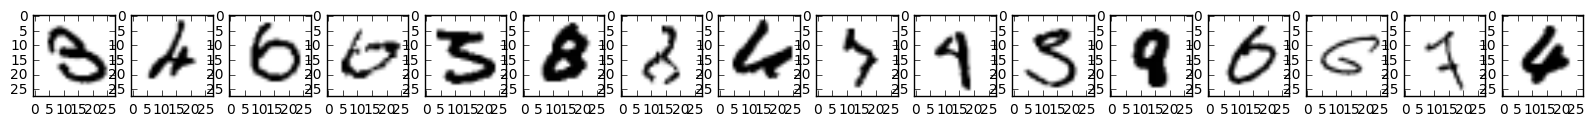

In [18]:
plt.figure(figsize=(20,5))
plt_idx = 1
for i in list(incorrect[:16]):
    plt.subplot(1, 16, plt_idx)
    pixels = mnist.test.images[i]
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray_r')
    plt_idx += 1
plt.show()


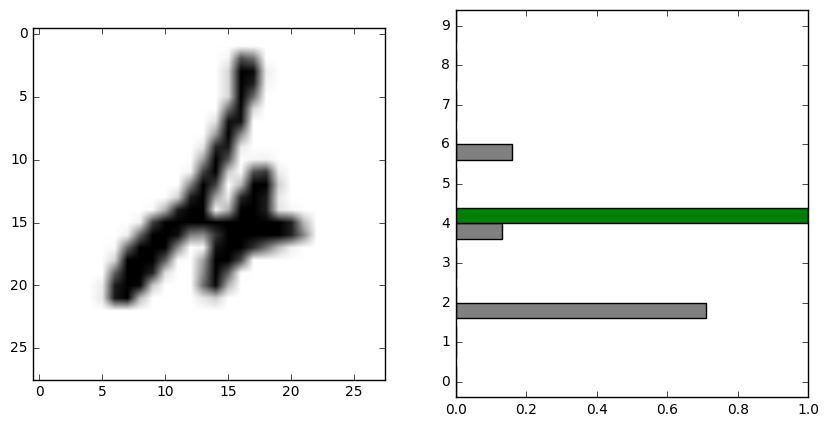

In [19]:
i = random.choice(list(incorrect))

pixels = mnist.test.images[i]
truth  = mnist.test.labels[i]
result = model.predict_on_batch(np.array([pixels]))[0]

test_render(pixels, result, truth)